<a href="https://colab.research.google.com/github/Data-Scientist-Engineer/Face-Mask-detection/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
batch_size = 50
img_height = 200
img_width = 200

In [6]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/python/Projet_CNN/data',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)


Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [7]:
type(training_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [8]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/python/Projet_CNN/data',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [9]:
class_names = training_ds.class_names
class_names

['with_mask', 'without_mask']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


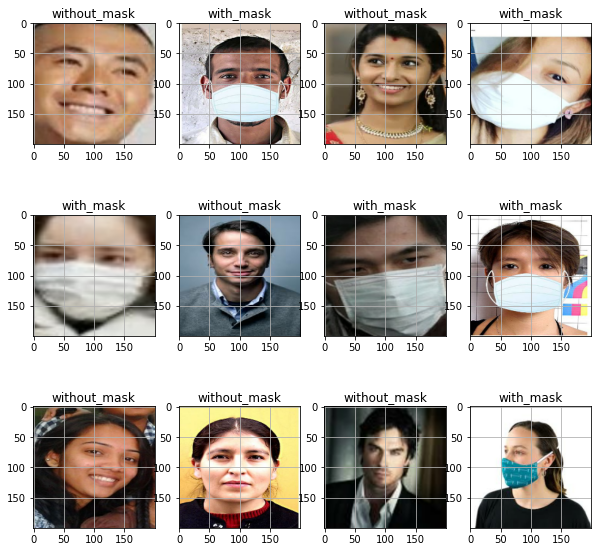

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(2):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
AUTOTUNE

-1

In [13]:
training_ds = training_ds.cache().prefetch(buffer_size = AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [14]:
training_ds

<PrefetchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [15]:
testing_ds

<PrefetchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [17]:

Modele1 = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  # Some thing I realised just
  # using flatten layer will 
  # increase the size of your
  # model, hence use
  # Global avg Pooling 
  # instead
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])

In [18]:
Modele1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
history = Modele1.fit(training_ds, validation_data= testing_ds, epochs = 20)

Epoch 1/20
121/121 [==============================] - 623s 5s/step - loss: 0.5617 - accuracy: 0.7063 - val_loss: 0.4787 - val_accuracy: 0.7728
Epoch 2/20
121/121 [==============================] - 17s 144ms/step - loss: 0.4937 - accuracy: 0.7706 - val_loss: 0.4312 - val_accuracy: 0.8119
Epoch 3/20
121/121 [==============================] - 17s 144ms/step - loss: 0.3870 - accuracy: 0.8342 - val_loss: 0.3119 - val_accuracy: 0.8715
Epoch 4/20
121/121 [==============================] - 17s 144ms/step - loss: 0.3079 - accuracy: 0.8734 - val_loss: 0.2490 - val_accuracy: 0.9099
Epoch 5/20
121/121 [==============================] - 17s 144ms/step - loss: 0.2684 - accuracy: 0.8923 - val_loss: 0.2248 - val_accuracy: 0.9159
Epoch 6/20
121/121 [==============================] - 17s 144ms/step - loss: 0.2380 - accuracy: 0.9058 - val_loss: 0.1938 - val_accuracy: 0.9305
Epoch 7/20
121/121 [==============================] - 17s 144ms/step - loss: 0.2146 - accuracy: 0.9166 - val_loss: 0.1791 - val_accu

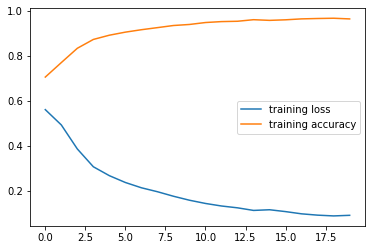

In [20]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


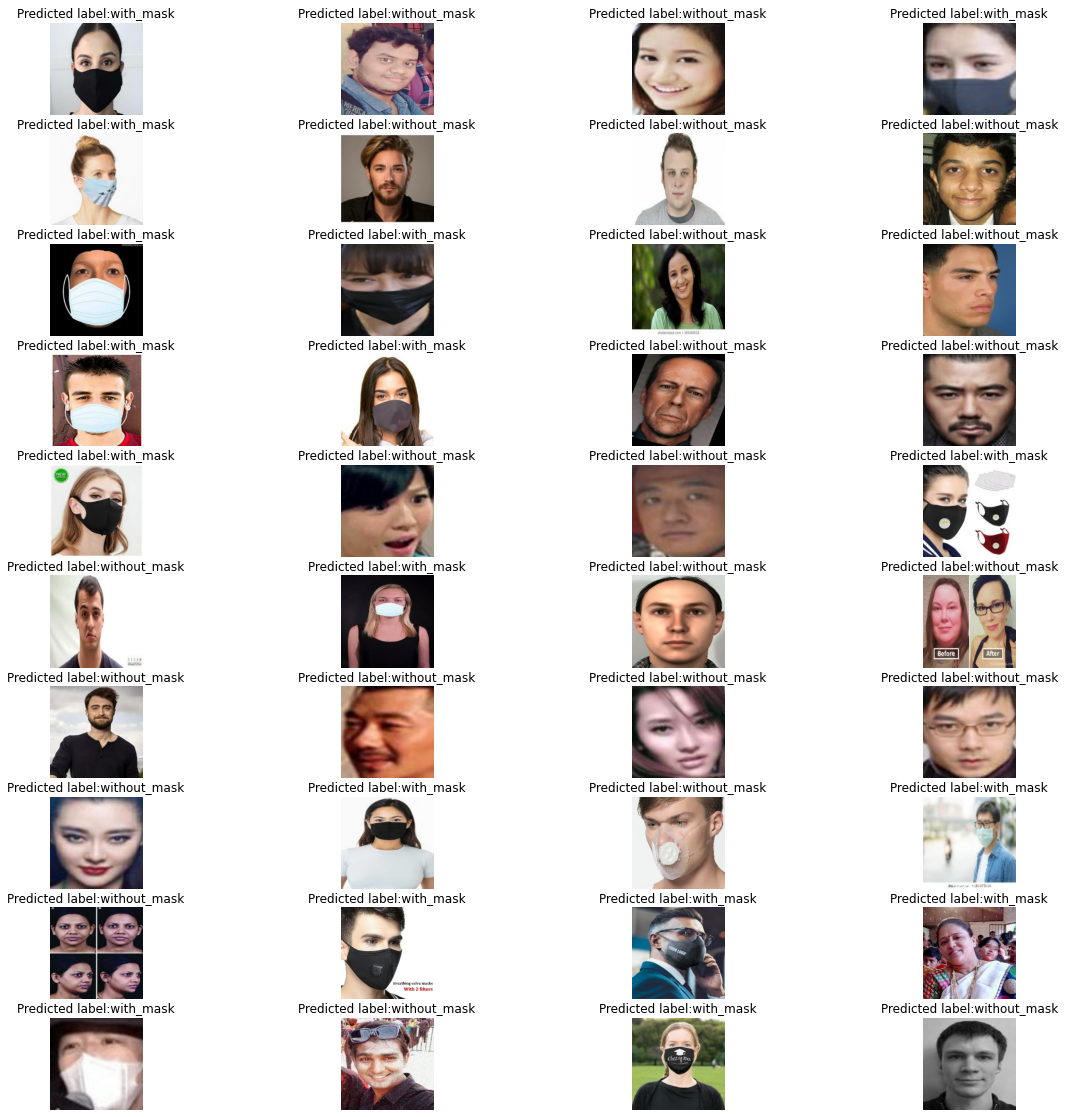

In [21]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = Modele1.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)   